<a href="https://colab.research.google.com/github/arushnab/bonn-eeg-ml/blob/main/notebooks/week01_load_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 01 – Load & Plot EEG Segments

This notebook loads and visualizes EEG segments from the Bonn dataset for five different physiological conditions:

- **Z**: Healthy, eyes open  
- **O**: Healthy, eyes closed  
- **N**: Interictal, non-epileptogenic zone  
- **F**: Interictal, epileptogenic zone  
- **S**: Ictal (during seizure)

For each class, we visualize 5 sample files to get an intuition for the amplitude, frequency, and pattern differences across brain states.


### Setup and File Uploads

In [15]:
from google.colab import files
import zipfile
import os
import sys

# Upload zip files
uploaded = files.upload()

# Unzip EEG dataset folders
dataset_zips = {
    "o.zip": "O",
    "n.zip": "N",
    "f.zip": "F",
    "s.zip": "S",
    "z (2).zip": "Z"
}
for zip_name, folder_name in dataset_zips.items():
    with zipfile.ZipFile(zip_name, 'r') as zip_ref:
        zip_ref.extractall(folder_name)

# Unzip repo
if "bonn-eeg-ml.zip" in uploaded:
    with zipfile.ZipFile("bonn-eeg-ml.zip", 'r') as zip_ref:
        zip_ref.extractall()

# Add scripts folder to system path
sys.path.append(os.path.abspath("bonn-eeg-ml/scripts"))


Saving bonn-eeg-ml.zip to bonn-eeg-ml.zip


###Import Functions
We import the preprocessing function from our `preprocess.py` module.**bold text**

In [17]:
from preprocess import load_eeg_folder
import matplotlib.pyplot as plt

###Plotting EEG Signal Helper Function

In [18]:
def plot_eeg_signals(folder_path, label, num_files=5, segment_length=1000):
    eeg_data = load_eeg_folder(folder_path, limit=num_files, segment_length=segment_length)

    for filename, data in eeg_data:
        plt.figure(figsize=(12, 4))
        if data.ndim == 1:
            plt.plot(data)
        else:
            for ch in range(data.shape[1]):
                plt.plot(data[:, ch], label=f'Channel {ch+1}')
            plt.legend()
        plt.title(f"{filename} – Set {label}")
        plt.xlabel("Time (samples)")
        plt.ylabel("Amplitude")
        plt.grid(True)
        plt.tight_layout()
        plt.show()


### Set Z – Healthy, Eyes Open

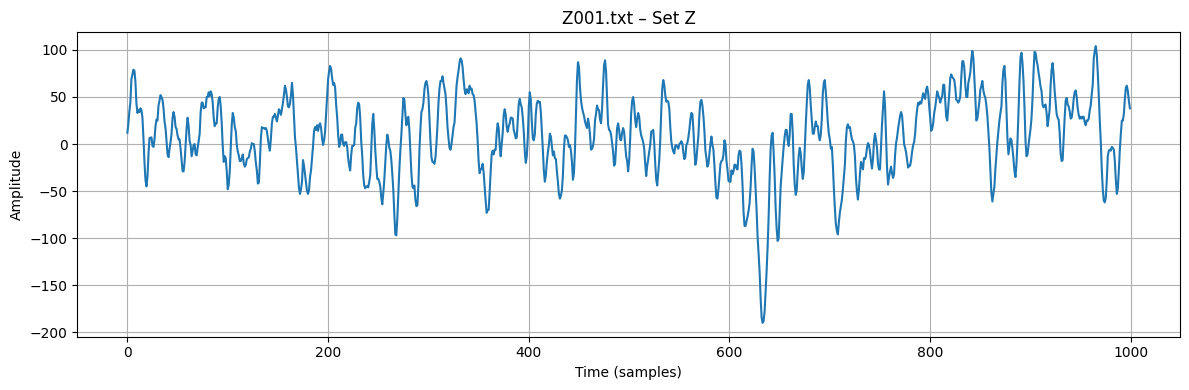

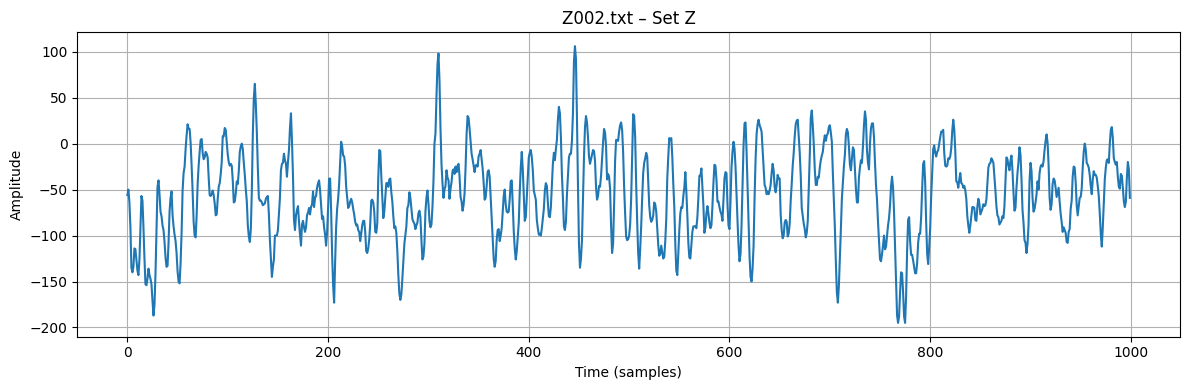

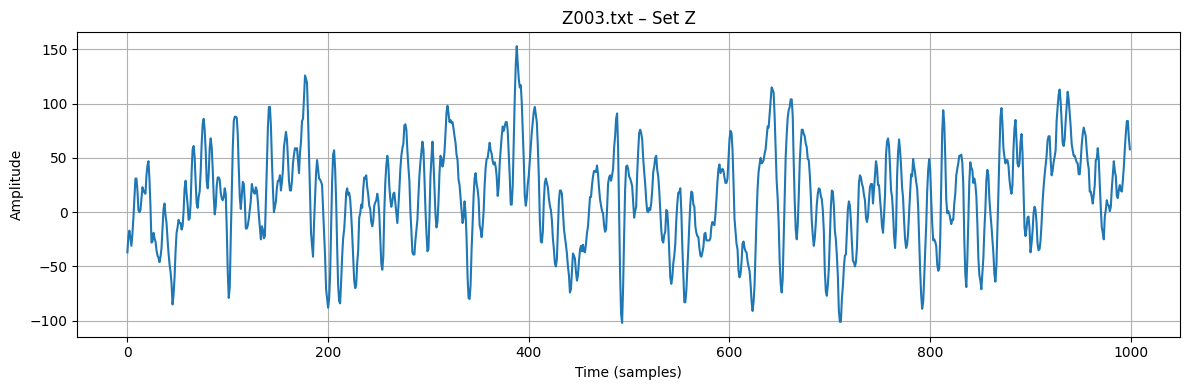

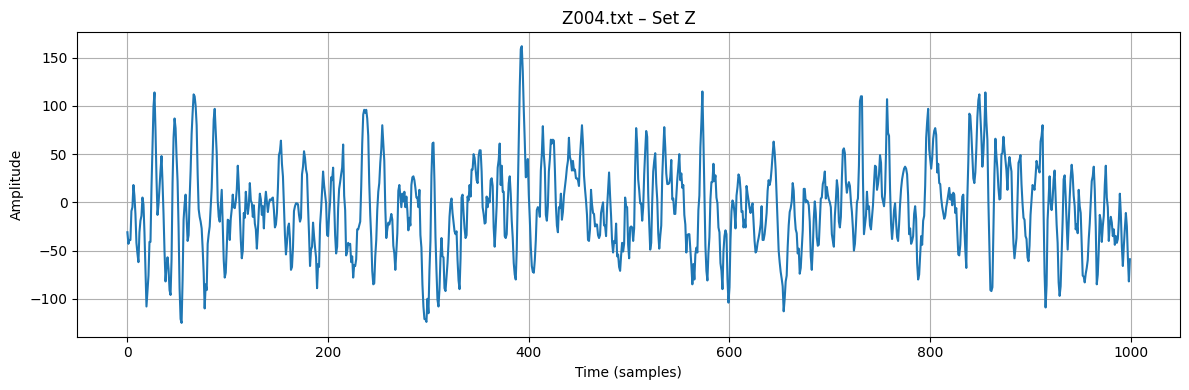

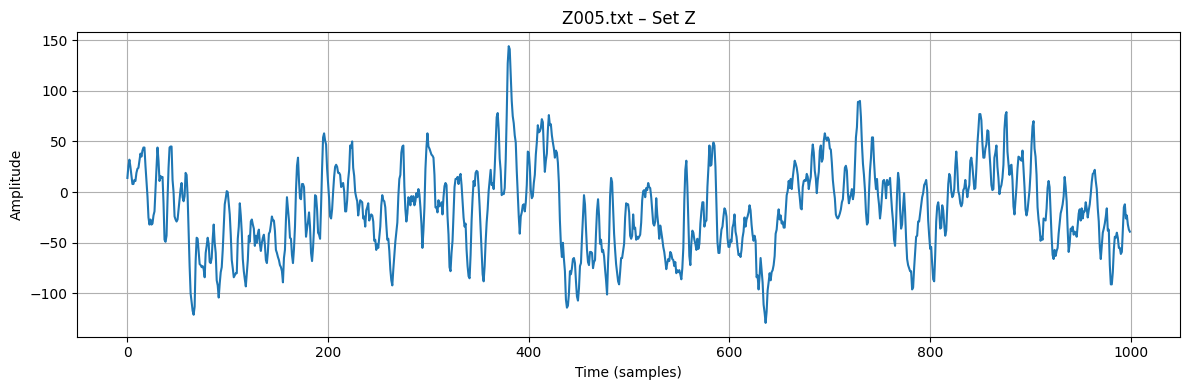

In [21]:
# Plot EEG signals from Set Z (healthy, eyes open)
plot_eeg_signals("Z/z/Z", label="Z")

### Set O – Healthy, Eyes Closed

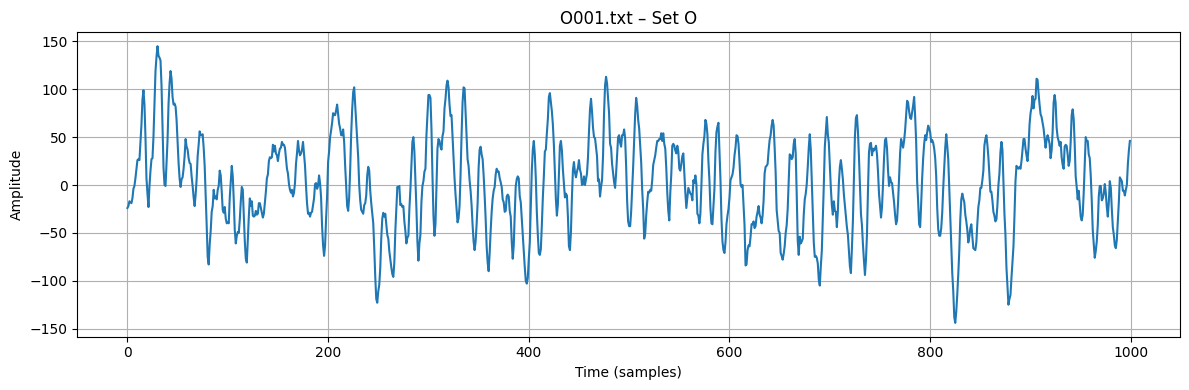

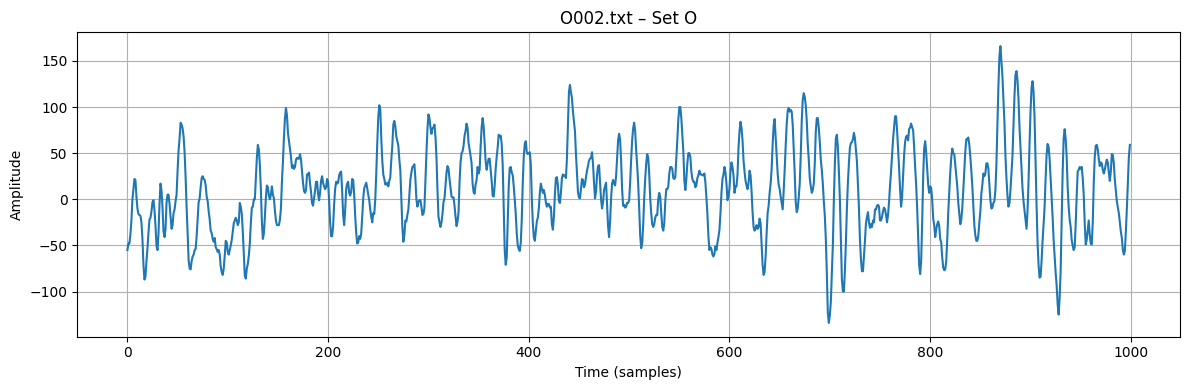

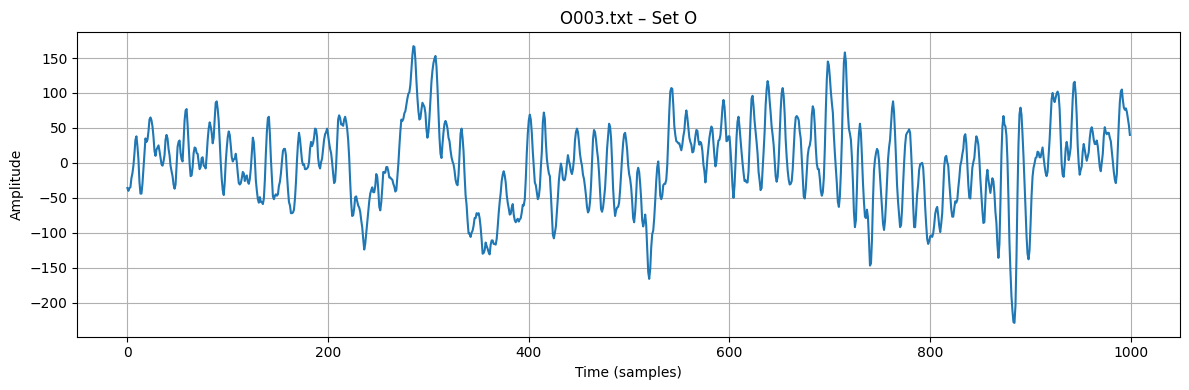

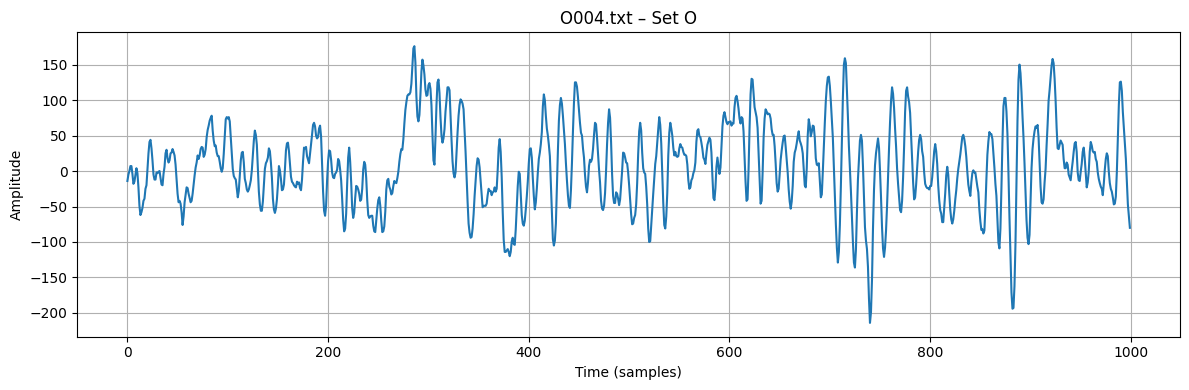

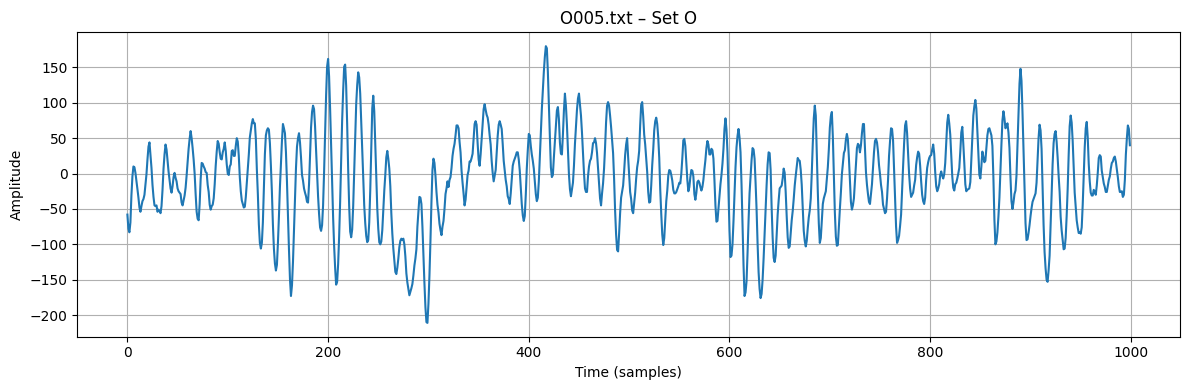

In [23]:
# Plot EEG signals from Set O (healthy, eyes closed)
plot_eeg_signals("O/O", label="O")

### Set N – Interictal, Non-Epileptogenic Zone


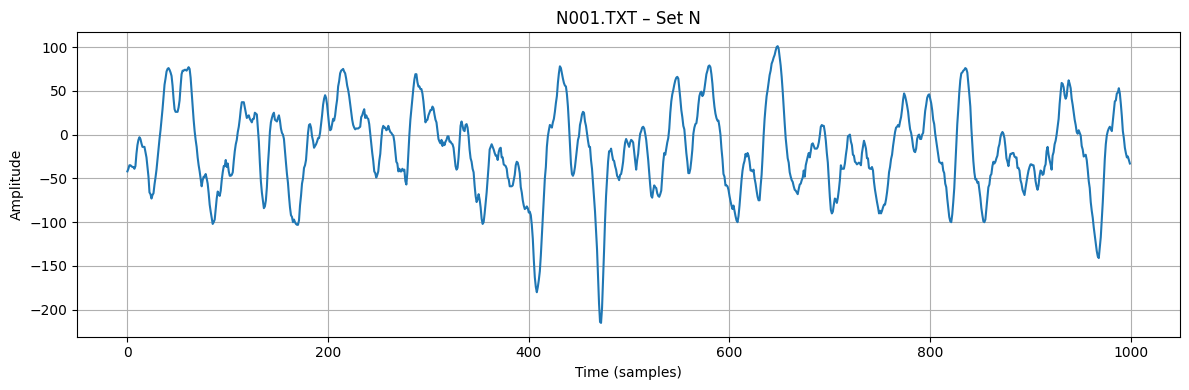

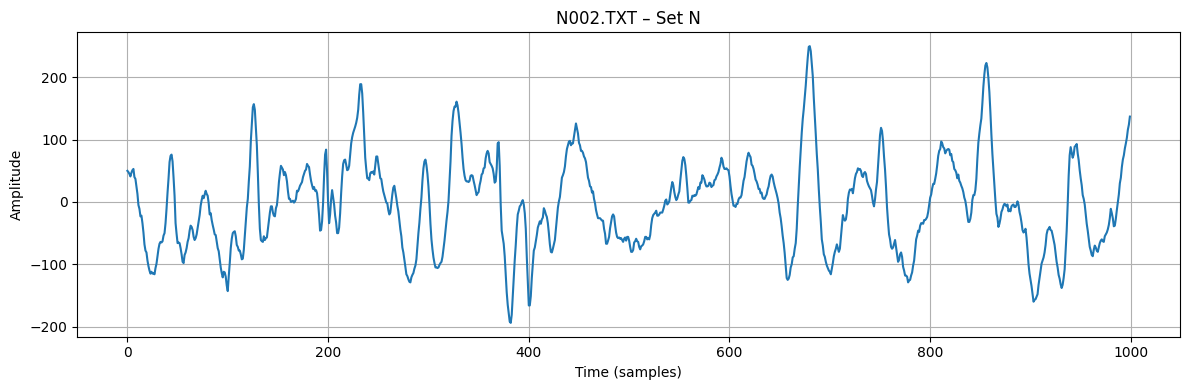

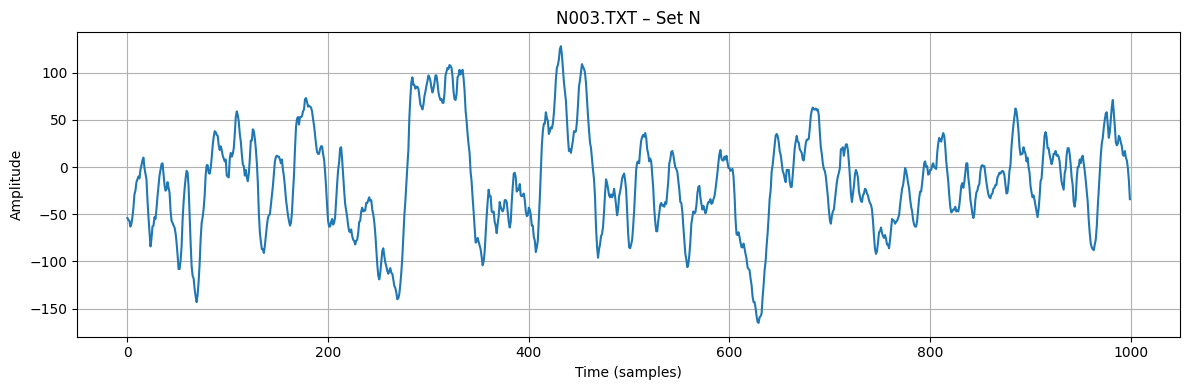

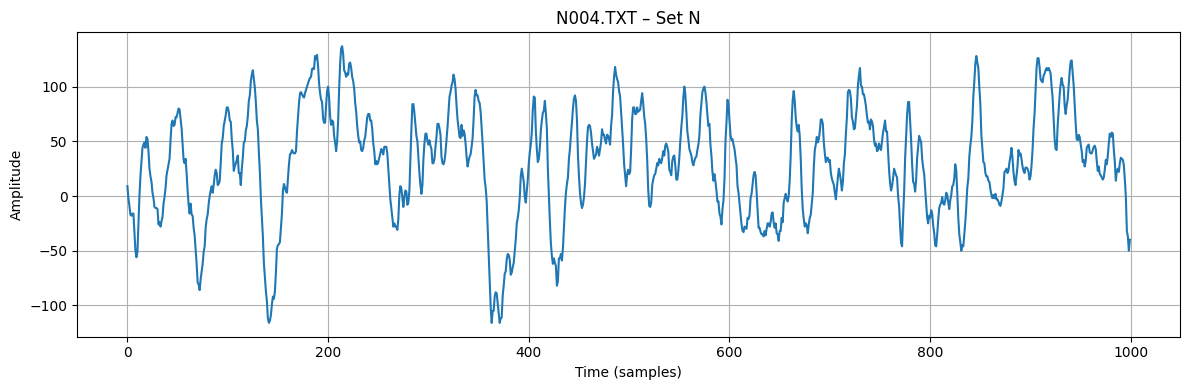

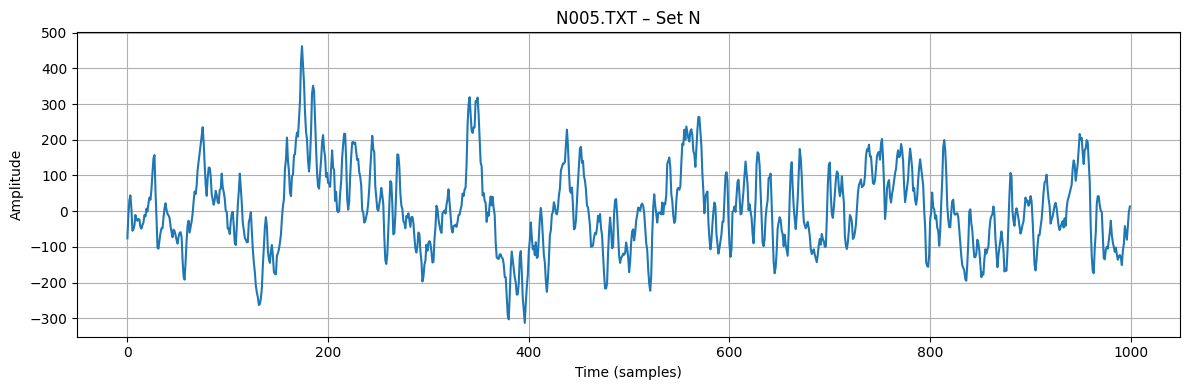

In [24]:
# Plot EEG signals from Set N (interictal, non-epileptogenic)
plot_eeg_signals("N/N", label="N")

### Set F – Interictal, Epileptogenic Zone


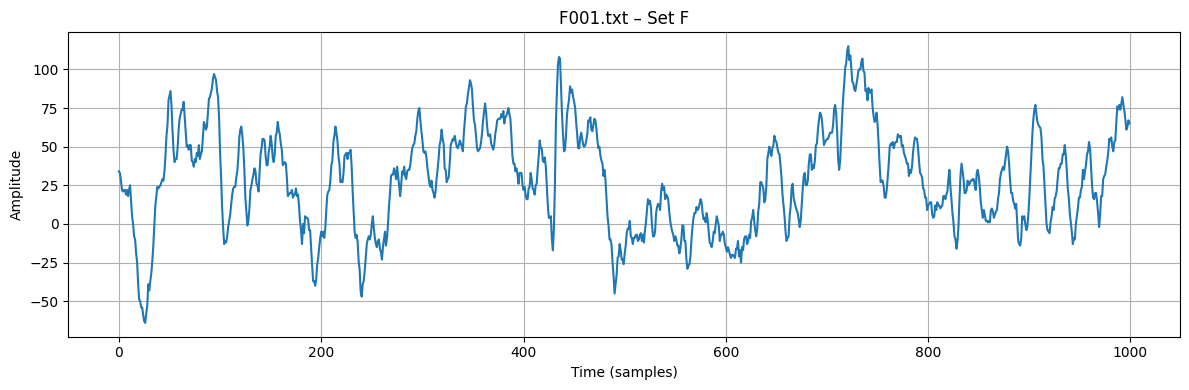

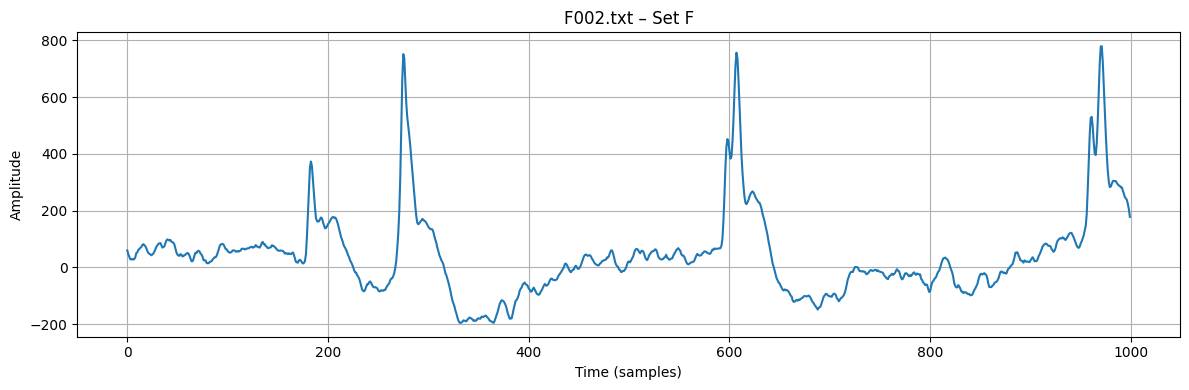

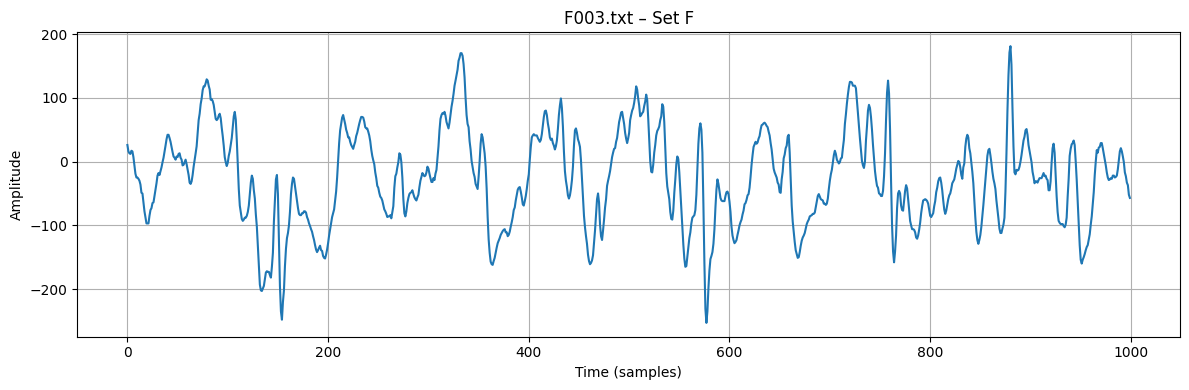

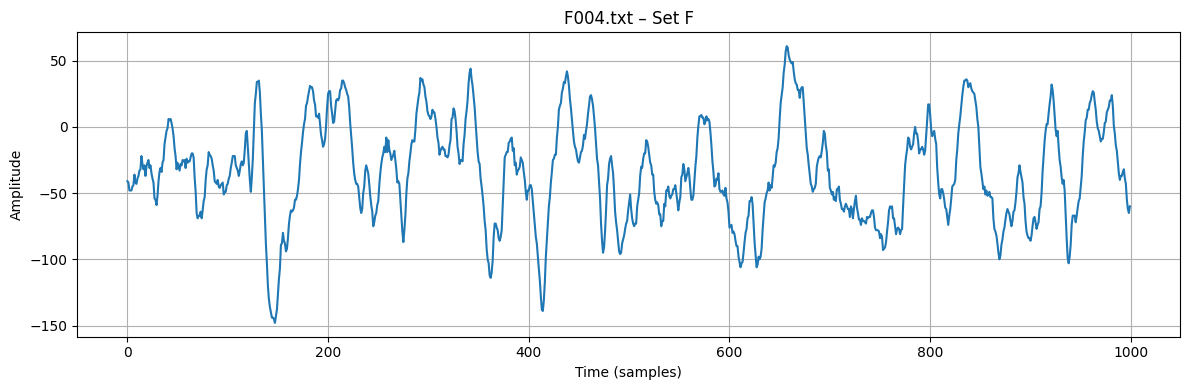

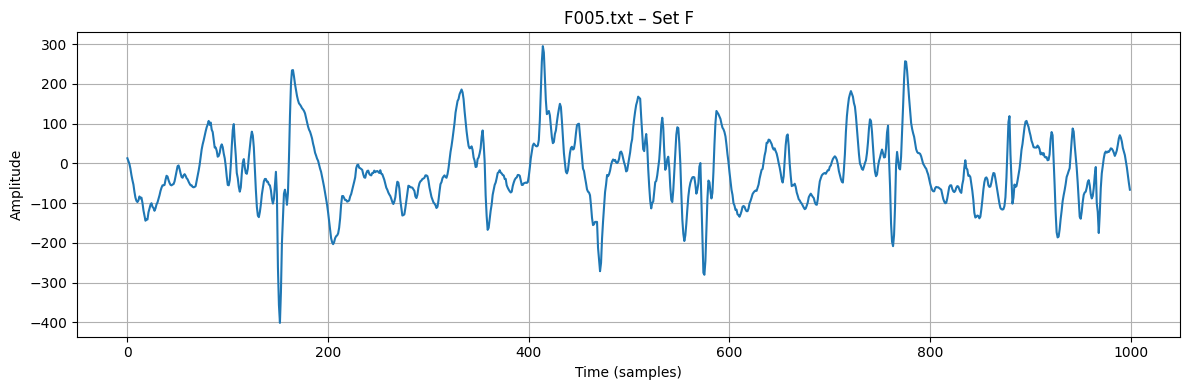

In [25]:
# Plot EEG signals from Set F (interictal, epileptogenic)
plot_eeg_signals("F/F",  label="F")

###Set S – Ictal (During Seizure)

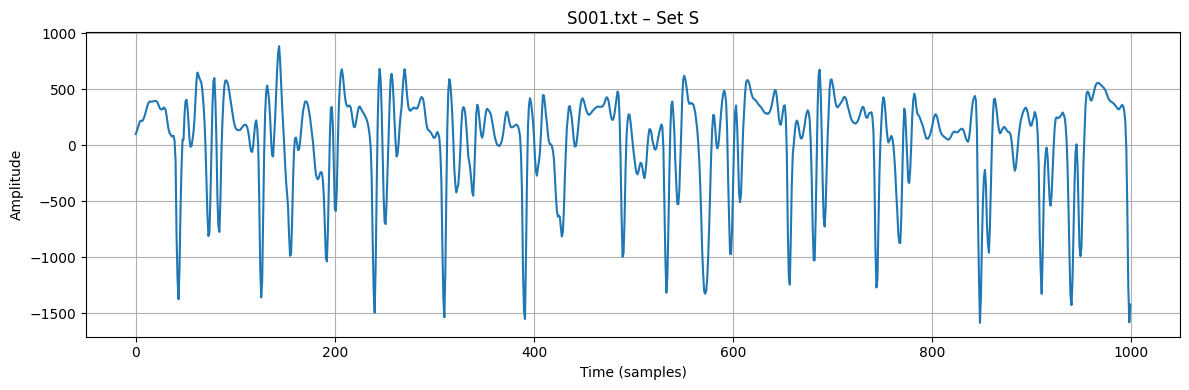

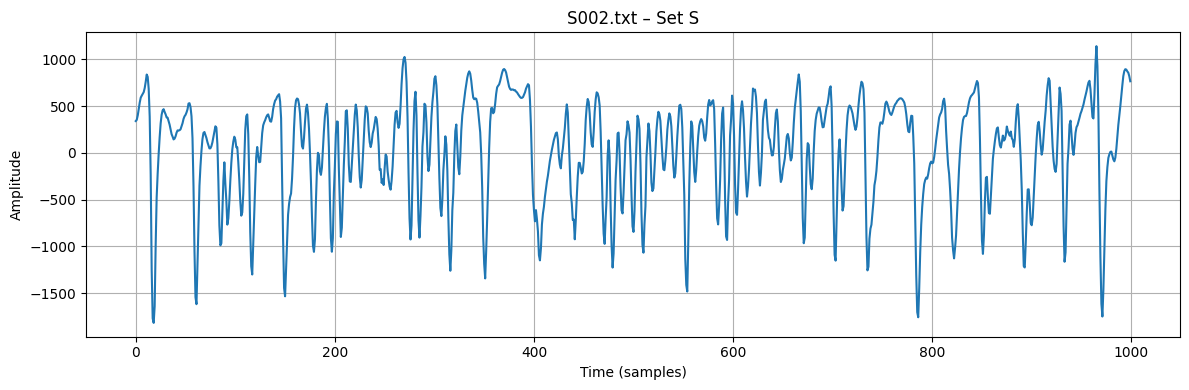

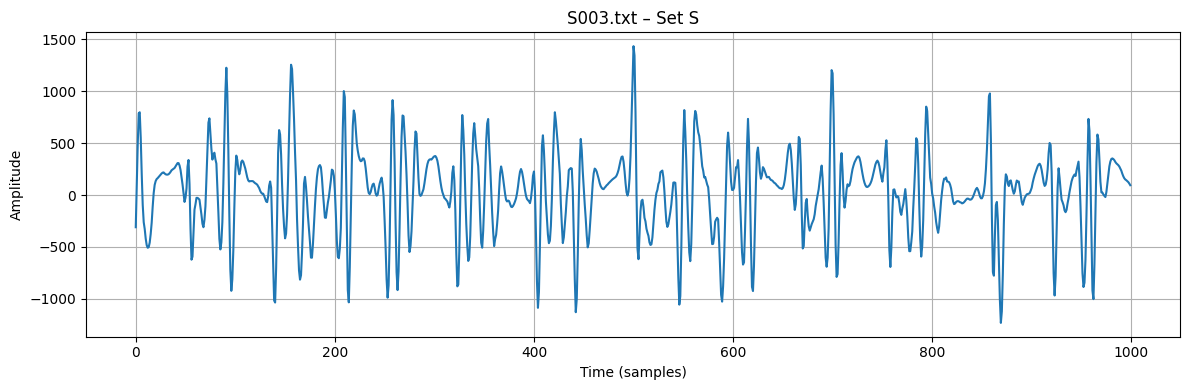

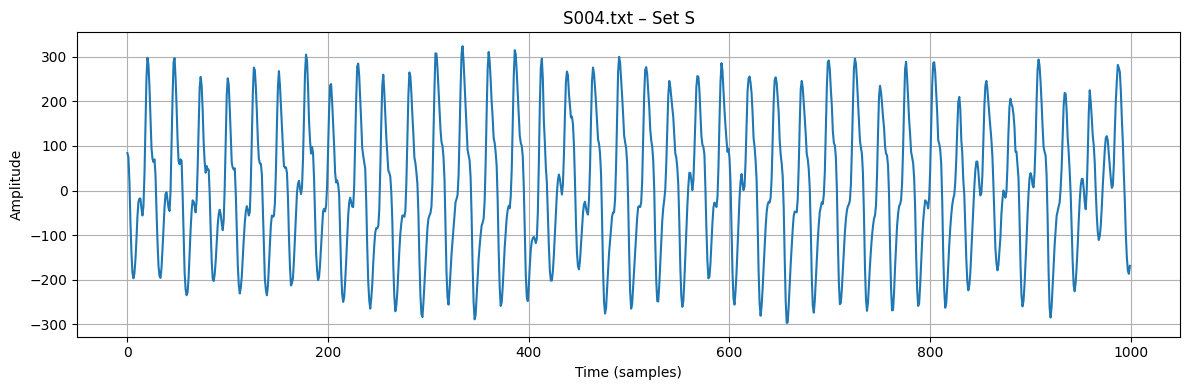

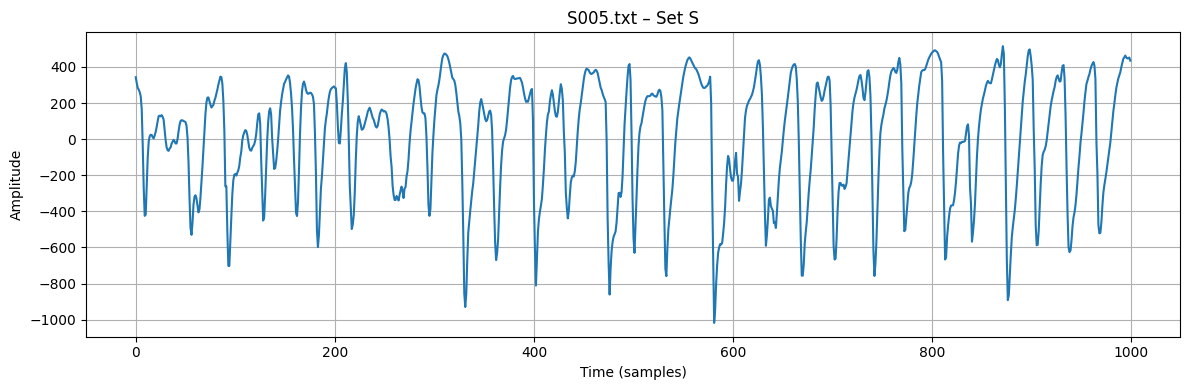

In [26]:
# Plot EEG signals from Set S (ictal, during seizure)
plot_eeg_signals("S/S", label="S")

##Observations & Notes

### Signal Pattern Observations by Set

**Set Z – Healthy, Eyes Open**  
- Very rapid signal changes, frequently oscillating from high to low.  
- Amplitudes mostly hover around 50 µV, with occasional spikes up to ~100 µV.  
- Activity is relatively stable and less extreme compared to seizure-related sets.

**Set O – Healthy, Eyes Closed**  
- Similar to Set Z in general structure, but with more frequent and pronounced peaks.  
- Amplitudes often reach 100–150 µV, suggesting stronger or more synchronized activity with eyes closed.

**Set N – Interictal, Non-Epileptogenic Region**  
- Overall slower changes compared to Sets Z and O.  
- While the signal can become abrupt, these shifts tend to persist for longer durations.  
- Suggests this region, although not triggering seizures, is still affected in some capacity.

**Set F – Interictal, Epileptogenic Zone**  
- Highly variable and irregular compared to Set N.  
- Signal changes are more abrupt and inconsistent across different files.  
- Some files show slow oscillations, while others exhibit sudden spikes — sometimes as high as 400–8000 µV.

**Set S – Ictal (Seizure Period)**  
- Fast and abrupt across all observed segments.  
- All five signals demonstrated dramatic, rhythmic spikes with different baseline shifts.  
- Amplitude ranges varied by region:  
  - Some peaked around 1000 µV  
  - Others centered around -200 µV, with amplitudes swinging from -800 to 400 µV.  
- This set clearly reflects seizure activity with highly pronounced waveform dynamics.

---

### General Takeaways
- **Healthy sets (Z, O)**: More regular, with lower amplitude variation.  
- **Interictal sets (N, F)**: More variability and regional differences.  
- **Ictal set (S)**: Consistently high amplitude, fast transitions, and strong signal instability — a clear indicator of seizure episodes.
